In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def RMSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error) ** 0.5

def MSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error)

def error(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    return np.mean(np.abs(Y_pred - Y))

In [3]:
class LinearRegressionGradientDescent:
    def __init__(self, alpha, epoches):
        self.alpha = alpha
        self.epoches = epoches
        self.m = 0 # np.random.random()
        self.b = 0 # np.random.random()
    
    def fit(self, X, Y):
        X, Y = np.array(X), np.array(Y)
        errors = []
        for iter in range(self.epoches):
            for x,y in zip(X, Y):
                der_m = self.cost_function_der_m(x, y)
                der_b = self.cost_function_der_b(x, y)
                self.m = self.m - self.alpha * der_m
                self.b = self.b - self.alpha * der_b
            Y_pred = self.predict(X)
            errors.append([iter+1, error(Y, Y_pred)])
        
        return errors

    def cost_function_der_m(self, x, y):
        return x*(self.predict([x])[0] - y)

    def cost_function_der_b(self, x, y):
        return (self.predict([x])[0] - y)

    def predict(self, X):
        X = np.array(X)
        return self.m*X + self.b


In [4]:
df = pd.read_csv('datasets/q1_data.csv')
X, Y = df['mother_height'], df['daughter_height']

In [5]:
df.head(5)

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70


In [6]:
model = LinearRegressionGradientDescent(0.0001, 4)
errors = model.fit(X, Y)
Y_pred = model.predict(X)
print(f'Coeffiecients are {model.m}, {model.b}')
print(f"Linear Regression:")
print("    Error:", error(Y, Y_pred))
print("    MSE:", MSE(Y, Y_pred))
print("    RMSE:", RMSE(Y, Y_pred))


Coeffiecients are 1.0149205396744159, 0.016406249586034958
Linear Regression:
    Error: 2.4776191904883746
    MSE: 7.985382074972457
    RMSE: 2.8258418347410132


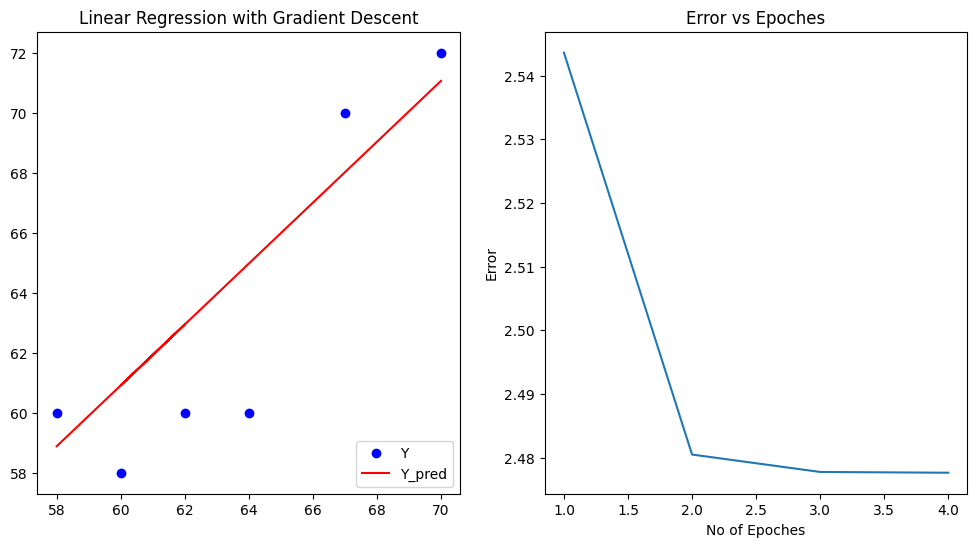

In [7]:
x = [item[0] for item in errors]
y = [item[1] for item in errors]

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, c='blue', label='Y')
plt.plot(X, Y_pred, c='red', label='Y_pred')
plt.legend(loc='lower right')
plt.title("Linear Regression with Gradient Descent")

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title("Error vs Epoches")
plt.xlabel("No of Epoches")
plt.ylabel("Error")

plt.show()


In [8]:
from sklearn.linear_model import SGDRegressor

In [15]:
model = SGDRegressor(max_iter=1000,learning_rate='constant', eta0=0.0001, random_state=42)
model.fit(X.to_frame(), Y.to_frame())

/home/5AIMLB2/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [16]:
model.coef_, model.intercept_

(array([1.02555764]), array([0.01558558]))